## Assignment Python 3


### Bank Marketing Dataset
#### Information about Dataset
The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

There are four datasets:

1.bank-additional-full.csv with all examples (41188) and 20 inputs, ordered by date (from May 2008 to November 2010), very close to the data analyzed in [Moro et al., 2014]

2.bank-additional.csv with 10% of the examples (4119), randomly selected from 1), and 20 inputs.

3.bank-full.csv with all examples and 17 inputs, ordered by date (older version of this dataset with less inputs).

4.bank.csv with 10% of the examples and 17 inputs, randomly selected from 3 (older version of this dataset with less inputs).
The smallest datasets are provided to test more computationally demanding machine learning algorithms (e.g., SVM).

The classification goal is to predict if the client will subscribe (yes/no) a term deposit (variable y).

#### Atributes Information
Input variables:

bank client data:
    
1 - age (numeric)

2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')

3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)

4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')

5 - default: has credit in default? (categorical: 'no','yes','unknown')

6 - housing: has housing loan? (categorical: 'no','yes','unknown')

7 - loan: has personal loan? (categorical: 'no','yes','unknown')


related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')

9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')

10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')

11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

#### other attributes:

12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

14 - previous: number of contacts performed before this campaign and for this client (numeric)

15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success') social and economic context attributes

16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)

17 - cons.price.idx: consumer price index - monthly indicator (numeric)

18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)

19 - euribor3m: euribor 3 month rate - daily indicator (numeric)

20 - nr.employed: number of employees - quarterly indicator (numeric)

#### Output variable (desired target):

21 - y - has the client subscribed a term deposit? (binary: 'yes','no')



### IMPORT LIBRARY

In [31]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate, StratifiedKFold
from collections import Counter
from imblearn.over_sampling import SMOTE

from sklearn.metrics import roc_auc_score
from sklearn.model_selection import  cross_val_score, StratifiedShuffleSplit, RandomizedSearchCV
from sklearn.metrics import accuracy_score, log_loss, classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
import pickle 

%matplotlib inline

### DATA LOADING

In [63]:
df_bank_add = pd.read_csv('bank-additional-full.csv',sep=';',decimal=',')

print('Data loading')

Data loading


In [69]:
df_bank_add

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [13]:
df_bank_add.info() #Informasi tentang struktur dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             41188 non-null  int64 
 1   job             41188 non-null  object
 2   marital         41188 non-null  object
 3   education       41188 non-null  object
 4   default         41188 non-null  object
 5   housing         41188 non-null  object
 6   loan            41188 non-null  object
 7   contact         41188 non-null  object
 8   month           41188 non-null  object
 9   day_of_week     41188 non-null  object
 10  duration        41188 non-null  int64 
 11  campaign        41188 non-null  int64 
 12  pdays           41188 non-null  int64 
 13  previous        41188 non-null  int64 
 14  poutcome        41188 non-null  object
 15  emp.var.rate    41188 non-null  object
 16  cons.price.idx  41188 non-null  object
 17  cons.conf.idx   41188 non-null  object
 18  euribo

In [14]:
# Menghitung jumlah nilai null pada datafarme
df_bank_add.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

Data sudah tidak ada yang missing value

In [15]:
#Memberikan informasi jumlah baris dan kolom pada dataframe
df_bank_add.shape

(41188, 21)

Data tersebut memiliki 41188 baris dan 21 kolom

In [16]:
#Menghitung nilai unik di setiap kolom dataframe
df_bank_add.nunique()

age                 78
job                 12
marital              4
education            8
default              3
housing              3
loan                 3
contact              2
month               10
day_of_week          5
duration          1544
campaign            42
pdays               27
previous             8
poutcome             3
emp.var.rate        10
cons.price.idx      26
cons.conf.idx       26
euribor3m          316
nr.employed         11
y                    2
dtype: int64

Menunjukkan setiap atribut dataset mempunyai lebih dari satu jenis value/nilainya.

In [17]:
#Memberikan informasi ringkasan statistik
df_bank_add.describe()

,age,duration,campaign,pdays,previous
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963
std,10.42125,259.279249,2.770014,186.910907,0.494901
min,17.00000,0.000000,1.000000,0.000000,0.000000
25%,32.00000,102.000000,1.000000,999.000000,0.000000
50%,38.00000,180.000000,2.000000,999.000000,0.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000
max,98.00000,4918.000000,56.000000,999.000000,7.000000


Atribut 'previous','campaign','duration' mempunyai nilai  yang lebih tinggi dari nilai mean(rata-rata) 
sehingga data atribut tersebut mempunyai sebuah outlier.

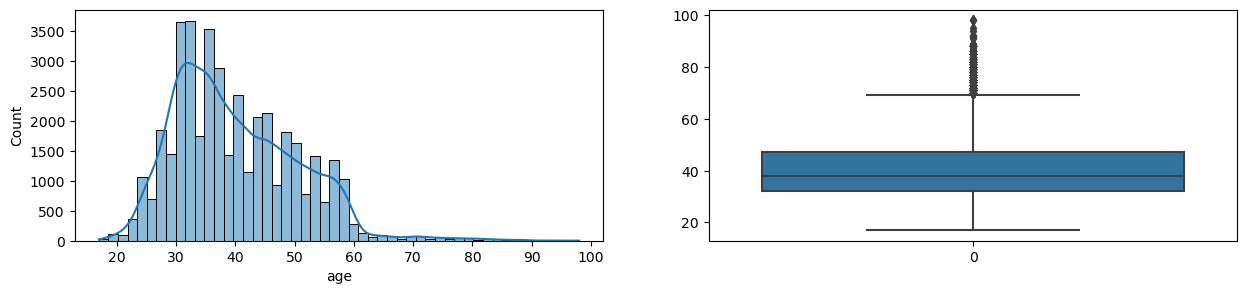

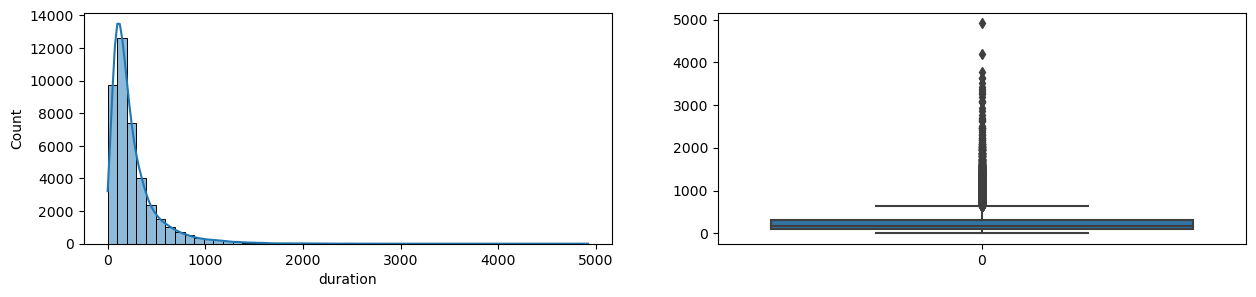

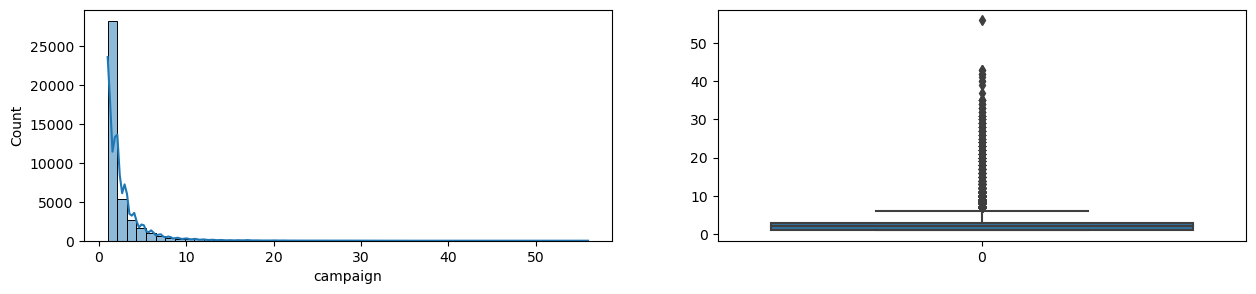

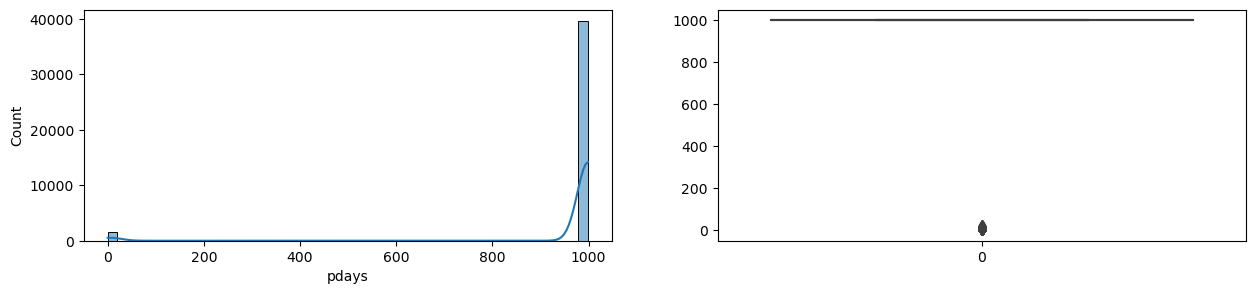

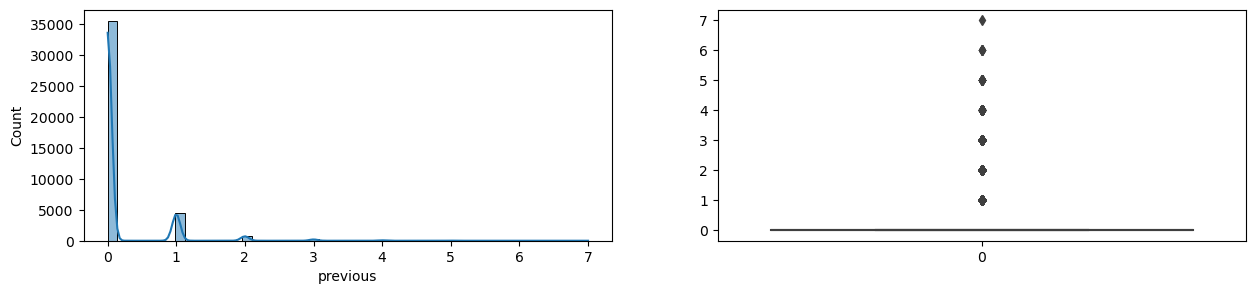

In [18]:
#Visualisasi histogram dan boxplot pada dataframe
num_col = ['age', 'duration', 'campaign', 'pdays', 'previous']

for x in num_col :
    fig, ax = plt.subplots(1, 2, figsize=(15, 3))
    sns.histplot(df_bank_add[x], bins=50, kde=True, ax=ax[0])
    sns.boxplot(data=df_bank_add[x], ax=ax[1])

Gambar di atas menunjukkan bahwa data tersebut memiliki banyak outliers.

In [73]:
# Menghapus outlier pada dataframe
def RemoveOutliers(df, num_cols):
    for col in num_cols:
        iqr = df[col].quantile(0.75)-df[col].quantile(0.25)
        lower_threshold = df[col].quantile(0.25)-(iqr*1.5)
        upper_threshold = df[col].quantile(0.75)+(iqr*1.5)
        print(f"Range value of outliers in {col} : <{round(lower_threshold,2)} atau >{round(upper_threshold,2)}")
        df.loc[(df[col]<=lower_threshold),col] = lower_threshold
        df.loc[(df[col]>=upper_threshold),col] = upper_threshold
        
RemoveOutliers(df_bank_add, num_col)

Range value of outliers in age : <9.5 atau >69.5
Range value of outliers in duration : <-223.5 atau >644.5
Range value of outliers in campaign : <-2.0 atau >6.0
Range value of outliers in pdays : <999.0 atau >999.0
Range value of outliers in previous : <0.0 atau >0.0


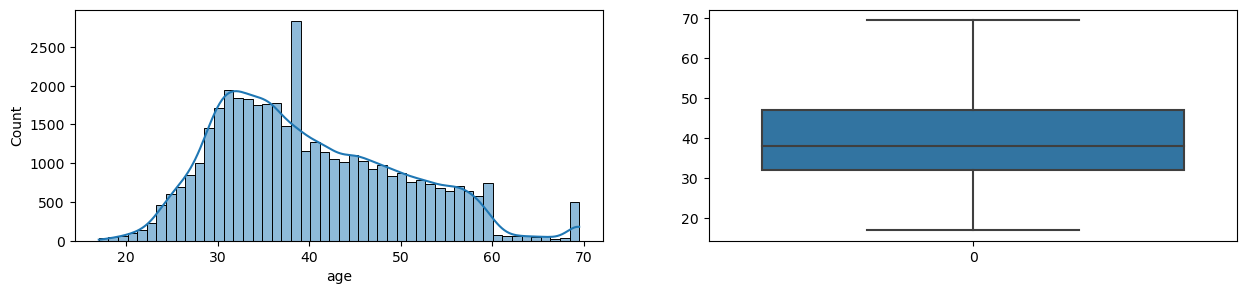

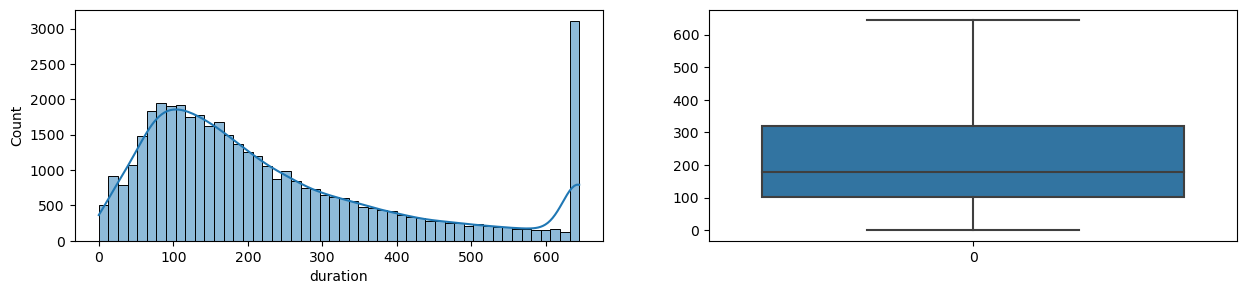

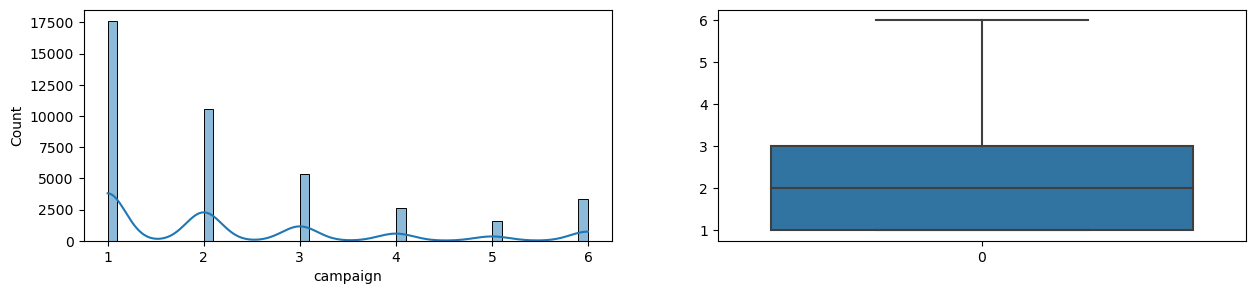

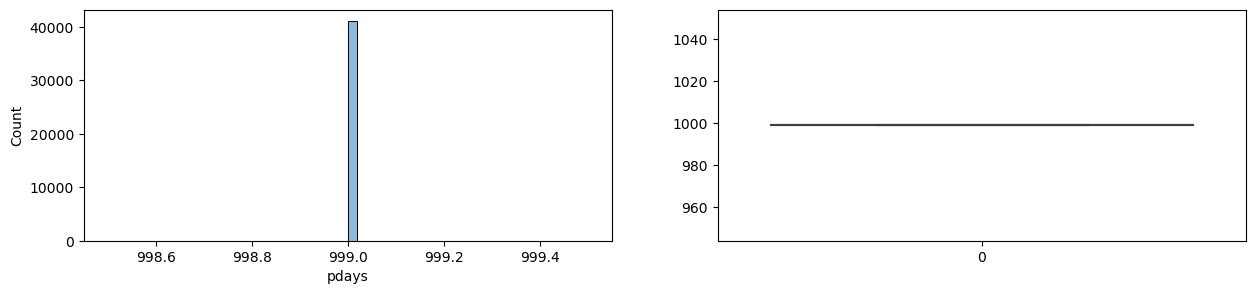

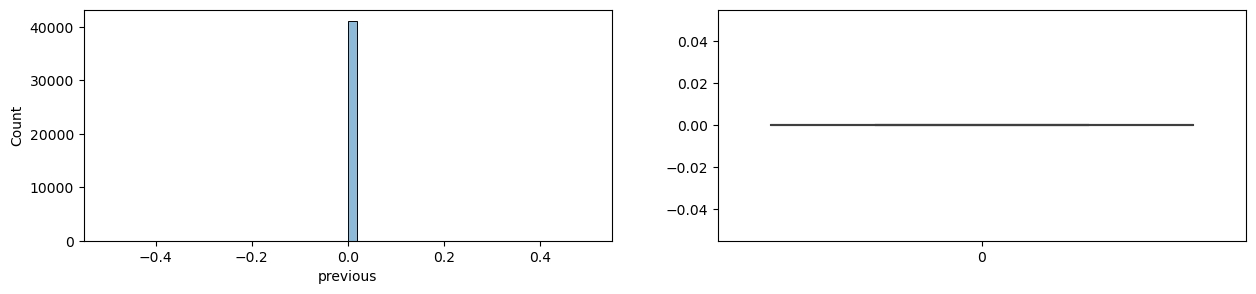

In [74]:
#Visualisasi histogram dan boxplot dalam dataframe
for x in num_col :
    fig, ax = plt.subplots(1, 2, figsize=(15, 3))
    sns.histplot(df_bank_add[x], bins=50, kde=True, ax=ax[0])
    sns.boxplot(data=df_bank_add[x], ax=ax[1])
    

Data menunjukkan sudah tidak ada lagi outliers.

### Data Processing

#### Encoding

In [71]:
df_bank_add.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             41188 non-null  int64 
 1   job             41188 non-null  object
 2   marital         41188 non-null  object
 3   education       41188 non-null  object
 4   default         41188 non-null  object
 5   housing         41188 non-null  object
 6   loan            41188 non-null  object
 7   contact         41188 non-null  object
 8   month           41188 non-null  object
 9   day_of_week     41188 non-null  object
 10  duration        41188 non-null  int64 
 11  campaign        41188 non-null  int64 
 12  pdays           41188 non-null  int64 
 13  previous        41188 non-null  int64 
 14  poutcome        41188 non-null  object
 15  emp.var.rate    41188 non-null  object
 16  cons.price.idx  41188 non-null  object
 17  cons.conf.idx   41188 non-null  object
 18  euribo

##### Data bertipe object diubah menjadi data bertipe numerik

In [20]:
#Melakukan encoding dengan Label Encoder pada atribut yang memiliki tipe data Object.
class MultiColumnLabelEncoder:
    def __init__(self, columns=None):
        self.columns = columns

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        output = X.copy()
        if self.columns is not None:
            for col in self.columns:
                output[col] = LabelEncoder().fit_transform(output[col])
        else:
            for colname, col in output.iteritems():
                output[colname] = LabelEncoder().fit_transform(col)
        return output

    def fit_transform(self, X, y=None):
        return self.fit(X, y).transform(X)


encoding_pipeline = Pipeline([
    ('encoding', MultiColumnLabelEncoder(columns:=[
                                                    'job',
                                                    'marital',
                                                    'education',
                                                    'default',
                                                    'housing',
                                                    'loan',
                                                    'contact',
                                                    'month',
                                                    'day_of_week',
                                                    'poutcome',
                                                    'emp.var.rate',
                                                    'cons.price.idx',
                                                    'cons.conf.idx',
                                                    'euribor3m',
                                                    'nr.employed',
                                                    'y'
                                                    ]

))
])

#Membuat variabel df_ep untuk menampung hasil encode
df_ep = encoding_pipeline.fit_transform(df_bank_add)


In [21]:
df_ep.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56.0,3,1,0,0,0,0,1,6,1,...,1,999,0,1,8,18,9,287,8,0
1,57.0,7,1,3,1,0,0,1,6,1,...,1,999,0,1,8,18,9,287,8,0
2,37.0,7,1,3,0,2,0,1,6,1,...,1,999,0,1,8,18,9,287,8,0
3,40.0,0,1,1,0,0,0,1,6,1,...,1,999,0,1,8,18,9,287,8,0
4,56.0,7,1,3,0,0,2,1,6,1,...,1,999,0,1,8,18,9,287,8,0


In [22]:
df_ep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  float64
 1   job             41188 non-null  int32  
 2   marital         41188 non-null  int32  
 3   education       41188 non-null  int32  
 4   default         41188 non-null  int32  
 5   housing         41188 non-null  int32  
 6   loan            41188 non-null  int32  
 7   contact         41188 non-null  int32  
 8   month           41188 non-null  int32  
 9   day_of_week     41188 non-null  int32  
 10  duration        41188 non-null  float64
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  int32  
 15  emp.var.rate    41188 non-null  int32  
 16  cons.price.idx  41188 non-null  int32  
 17  cons.conf.idx   41188 non-null 

#### Mencari korelasi antar atribut

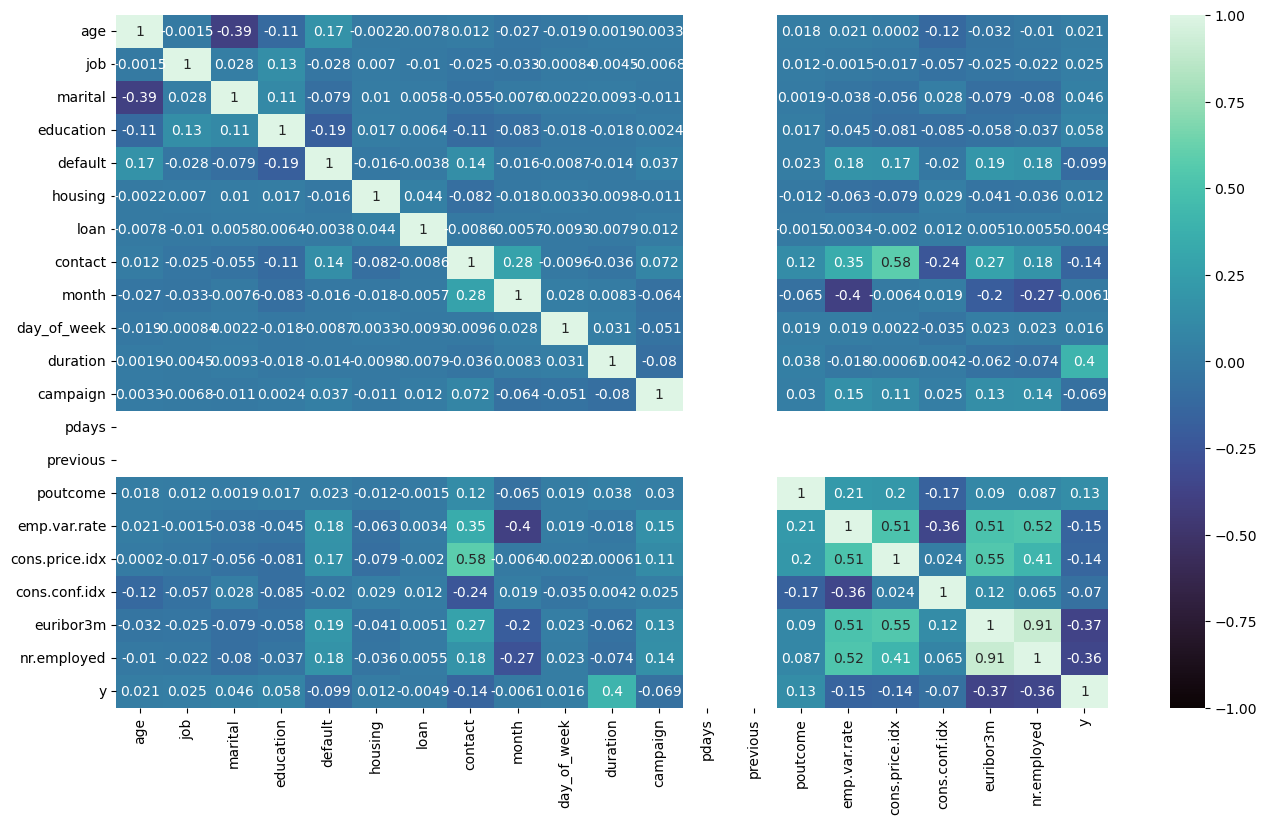

In [23]:
#Visualisasi korelasi antar kolom
plt.figure(figsize=(16,9))
sns.heatmap(df_ep.corr(),vmin=-1, vmax=1, annot=True, cmap='mako')
plt.show()

#### Mencari korelasi atribut dengan atribut y

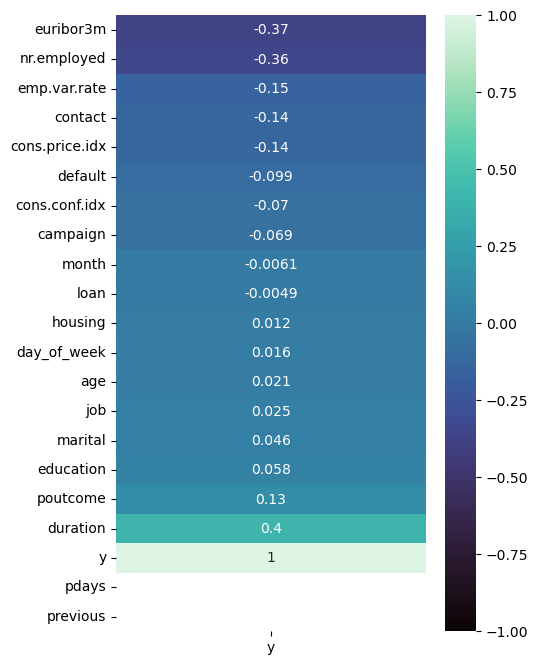

In [24]:
# Visualisasi korelasi atribut data terhadap y
plt.figure(figsize=(5, 8))
sns.heatmap(df_ep.corr()[['y']].sort_values(by='y'),vmin=-1, vmax=1, annot=True, cmap='mako')
plt.show()

In [25]:
#Membuat dataframe baru
df_predict = df_ep.drop(columns=['month', 'loan', 'housing', 'day_of_week'])
df_predict.head()

,age,job,marital,education,default,contact,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56.0,3,1,0,0,1,261.0,1,999,0,1,8,18,9,287,8,0
1,57.0,7,1,3,1,1,149.0,1,999,0,1,8,18,9,287,8,0
2,37.0,7,1,3,0,1,226.0,1,999,0,1,8,18,9,287,8,0
3,40.0,0,1,1,0,1,151.0,1,999,0,1,8,18,9,287,8,0
4,56.0,7,1,3,0,1,307.0,1,999,0,1,8,18,9,287,8,0


#### TRAINING DATA

In [32]:
y = df_predict['y']
X = df_predict.drop(['y'], axis=1)

In [75]:
print("Before oversampling : ", Counter(y))

Before oversampling :  Counter({0: 36548, 1: 4640})


#### Jumlah data diseimbangkan


In [76]:
sm = SMOTE()
X_sm, y_sm = sm.fit_resample(X,y)
print("After oversampling : ", Counter(y_sm))

After oversampling :  Counter({0: 36548, 1: 36548})


#### Data split

In [42]:
# Splitting data untuk training, testing, dan validasi
X_new, X_val, y_new, y_val = train_test_split(X, y, test_size=0.1, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, test_size=0.2, random_state=0)

#### Data scalling

In [45]:
# Melakukan rescalling terhadap data yang memiliki distribusi data berjauhan
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_training = scaler.fit_transform(X_train)
x_testing = scaler.transform(X_test)
x_validation = scaler.transform(X_val)

### Evaluasi

In [46]:
classifiers = [KNeighborsClassifier(3),
               SVC(probability=True),
               DecisionTreeClassifier(),
               RandomForestClassifier(),
               LogisticRegression(),
               GaussianNB()]

log_cols = ['Classifier', 'Accuracy']

log = pd.DataFrame(columns=log_cols)

SSS = StratifiedShuffleSplit(n_splits=10, test_size=1/3, random_state=0)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_12160\3207252682.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  log = log.append(log_entry)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_12160\3207252682.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  log = log.append(log_entry)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_12160\3207252682.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  log = log.append(log_entry)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_12160\3207252682.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  log = log.append(log_entry)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_12160\3207252682.py:16: Fut

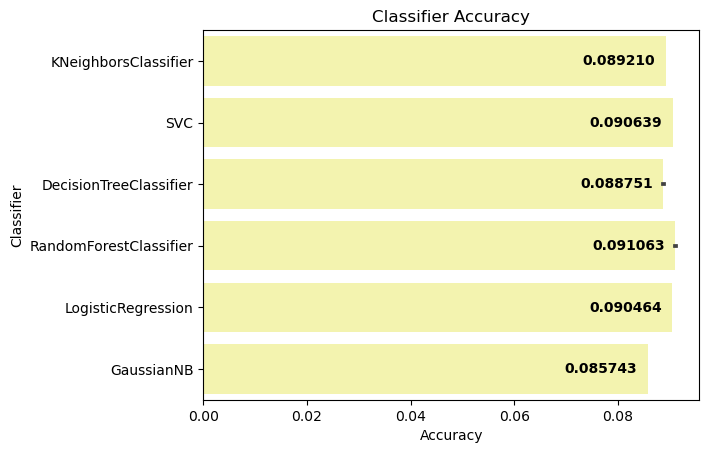

In [62]:
acc_dictio = {}

for item in classifiers :
    name = item.__class__.__name__
    item.fit(x_training, y_train)
    training_predict = item.predict(x_testing)
    acc = accuracy_score(y_test, training_predict)
    if name in acc_dictio:
      acc_dictio[name] += acc
    else:
        acc_dictio[name] = acc

for item in acc_dictio :
  acc_dictio[item] = acc_dictio[item]/10
  log_entry = pd.DataFrame([[item, acc_dictio[item]]], columns=log_cols)
  log = log.append(log_entry)

plt.xlabel('Accuracy')
plt.title('Classifier Accuracy')

ax = sns.set_color_codes('pastel')
ax = sns.barplot(x='Accuracy', y='Classifier', data=log, color='y')
for i in ax.containers :
  ax.bar_label(i,fmt="%.6f",padding=-60,color="black",fontweight="bold")

Dari gambar di atas menunjukkan jika model akurasi terbaik yaitu menggunakan model Random Forest Classifier.

### Improve Model

#### Mencari parameter model yang terbaik

In [52]:
# menggunakan model RandomForestClassifier
model_rfc = RandomForestClassifier()
param_grid = {'n_estimators':[100,200, 300, 400, 500],
              'criterion' : ['gini', 'entropy'],
              'max_features' : ['auto', 'sqrt', 'log2'],
              'max_depth' : [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
              'bootstrap' : [True, False],
              'min_samples_split' : [2, 3, 4, 5, 6, 7, 8, 9, 10],
              'class_weight' : ['balanced', 'balanced_subsample'],
              'min_samples_leaf':[1, 2, 3, 4, 5]}
rscv = RandomizedSearchCV(model_rfc, param_grid, cv=10, scoring='f1_micro')
rscv.fit(x_training, y_train) 
print(rscv.best_params_)
print(rscv.best_score_)

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value f

{'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 3, 'max_features': 'auto', 'max_depth': 19, 'criterion': 'entropy', 'class_weight': 'balanced', 'bootstrap': True}
0.9019725182194153


In [53]:
# Menampilkan parameter terbaik model
model_rfc = rscv.best_estimator_
print(model_rfc)

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=19, max_features='auto', min_samples_leaf=3,
                       n_estimators=300)


In [54]:
# Menampilkan hasil prediksi
y_predict_test = model_rfc.predict(x_testing)
print(y_predict_test)

[0 1 0 ... 0 0 0]


In [55]:
# mendapatkan laporan/report mengenai klasifikasi
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.97      0.91      0.94      6559
           1       0.54      0.79      0.64       855

    accuracy                           0.90      7414
   macro avg       0.76      0.85      0.79      7414
weighted avg       0.92      0.90      0.91      7414



### Inference Model

In [56]:
# Memprediksi data baru 
y_predict_val = model_rfc.predict(x_validation)
y_predict_val

array([1, 0, 0, ..., 0, 0, 1])

In [57]:
#Mencetak laporan mengenai klasifikasi
print(classification_report(y_val, y_predict_val))

              precision    recall  f1-score   support

           0       0.98      0.91      0.94      3665
           1       0.53      0.83      0.65       454

    accuracy                           0.90      4119
   macro avg       0.76      0.87      0.80      4119
weighted avg       0.93      0.90      0.91      4119



[[Text(0, 0.5, 'Actual 0s'), Text(0, 1.5, 'Actual 1s')]]

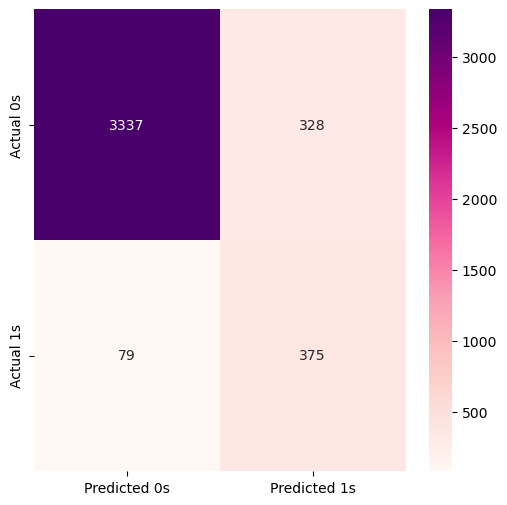

In [60]:
#Visualisasi Confusion Matrix menggunakan heatmap
cm_rfc = confusion_matrix(y_val, y_predict_val)
fig, ax = plt.subplots(figsize=(6, 6))

sns.heatmap(cm_rfc, annot=True, fmt=".0f", ax=ax, cmap='RdPu')

ax.xaxis.set(ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticklabels=('Actual 0s', 'Actual 1s'))

### Simpan Model

In [59]:
pickle.dump(model_rfc, open('predict_bank_rfc.pkl', 'wb'))

#### Analisis Kesimpulan

Berdasarkan program yang telah dijalankan, dapat ditarik beberapa kesimpulan:

1.Dataset awal bank-additional-full.csv memiliki 21 atribut, namun hanya 17 atribut yang digunakan untuk melakukan prediksi.

2.Setelah dilakukan prediksi menggunakan beberapa model seperti KNN, SVC, Decision Tree Classifier, Random Forest Classifier, Logistic Regression, dan Naive Bayes, ditemukan bahwa hasil prediksi terbaik diperoleh dengan menggunakan model Random Forest Classifier.

3.Penggunaan model Random Forest Classifier menghasilkan akurasi sebesar 0.90899, yang menunjukkan tingkat keakuratan yang tinggi dalam memprediksi data.

Dengan demikian, berdasarkan analisis yang dilakukan, model Random Forest Classifier dapat dianggap sebagai model terbaik untuk memprediksi data pada dataset bank-additional-full.csv, dengan tingkat akurasi yang mencapai 0.90899.